Task 3 

In [1]:
import numpy
import cv2
import matplotlib.pyplot as mpl

1) Opening the source image (and naming it image 1):

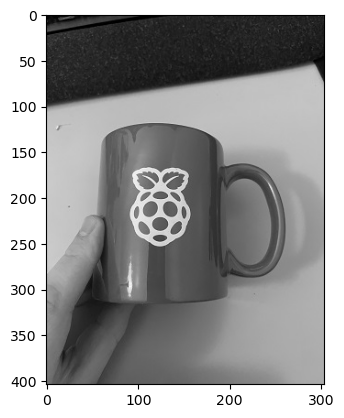

(<matplotlib.image.AxesImage at 0x2ad2d7b3490>, None)

In [2]:
img1 = cv2.imread("RaspberryPiMug.jpg") 
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB)

mpl.imshow(img1),mpl.show()

 2) Detecting keypoints and descriptors on the source image (img1) using ORB and BFMatcher

In [3]:
#Start orb dectector and find keypoints and discriptors
orb = cv2.ORB_create()
keyp1, des1 = orb.detectAndCompute(img1, None)

In [4]:
#Start BF matcher
bf = cv2.BFMatcher_create()

3) Opening a video capture window 


In [5]:
cap = cv2.VideoCapture(0)

4)  Process each frame of the video stream


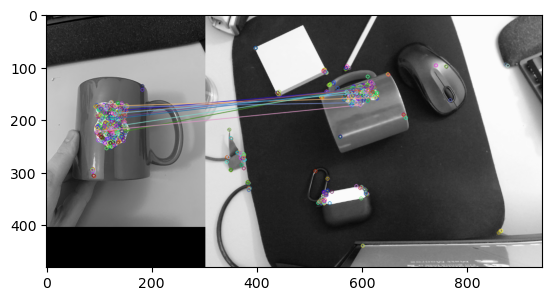

(<matplotlib.image.AxesImage at 0x2ad2d93eed0>, None)

In [6]:
# Loop that matches img1 to live video capture. 
#ORB is used to find Keyp2 and des2 of the video frams
#BFMatcher is used to match des1 and des2, along with their distance
#The 10 best features are drawn
while True:
    ret, img2 = cap.read()
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    keyp2, des2 = orb.detectAndCompute(img2, None)
    matches = bf.match(des1, des2)
    
    img3 = cv2.drawMatches(img1, keyp1, img2, keyp2, matches[:10], outImg=None)
    cv2.imshow("Object Tracking", img3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
mpl.imshow(img3),mpl.show()

Above is the result of our feature matching between the original image(left)
and the last frame of the video (right).

8) Stop the video and save the last image

In [7]:
#Save the last image as "Last_Frame", and save the matched images as "Matched images" 
cv2.imwrite("Last_Frame.jpg", img2) #saves last frame of video only. Not sure if this is needed, but still added it.
cv2.imwrite("Matched_Images.jpg", img3)

cap.release()
cv2.destroyAllWindows()